# Adaptive Line Enhancer

![](./screenshots/adaptive-line-enhancer-prolog.png)

![](./screenshots/adaptive-line-enhancer-block-diagram.png)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import padasip as pa # adaptive filter package
from scipy import signal
from lms import lms_filter, LmsResult

In [5]:
# read ecg.dat into a numpy array
ecg = np.loadtxt('./data/ecg.dat')
n_samples = ecg.size
Fs = 500 # sampling frequency

> 7 Implement an adaptive line enhancer

In [16]:
delay = 1 # delay in seconds
delay_samples = int(delay * Fs) # delay in samples
ecg_delayed = np.zeros(n_samples)
ecg_delayed[delay_samples:] = ecg[:-delay_samples]


In [17]:
# instead of using a synthetic cosine signal, we use a delayed version of the ecg signal
# as the desired signal
d = ecg_delayed
x = ecg


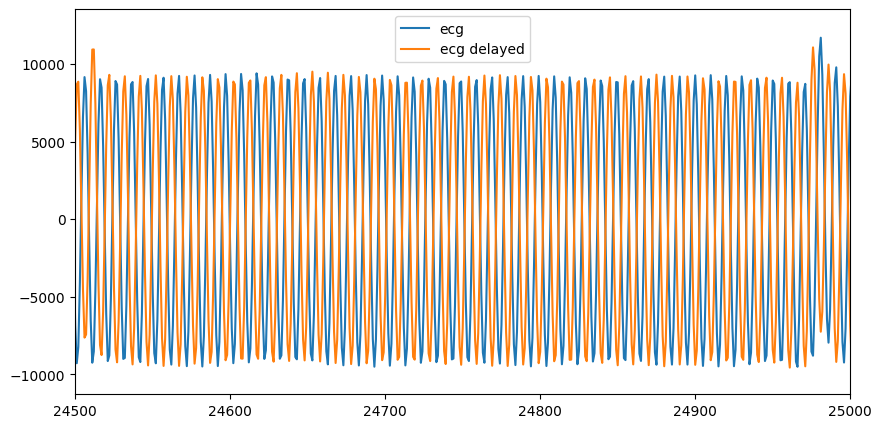

In [18]:
# plot the ecg signal and the delayed ecg signal to see the difference
plt.figure(figsize=(10, 5))
plt.plot(ecg, label='ecg')
plt.plot(ecg_delayed, label='ecg delayed')
plt.legend()
plt.xlim(24500, 25000)
plt.show()


In [20]:


# run lms filter
mu = 0.01
ntaps = 2

lms_result = lms_filter(x, d, mu, ntaps)



# shift = 4
# np.corrcoef(ecg[:-shift], ecg[shift:])[0, 1]


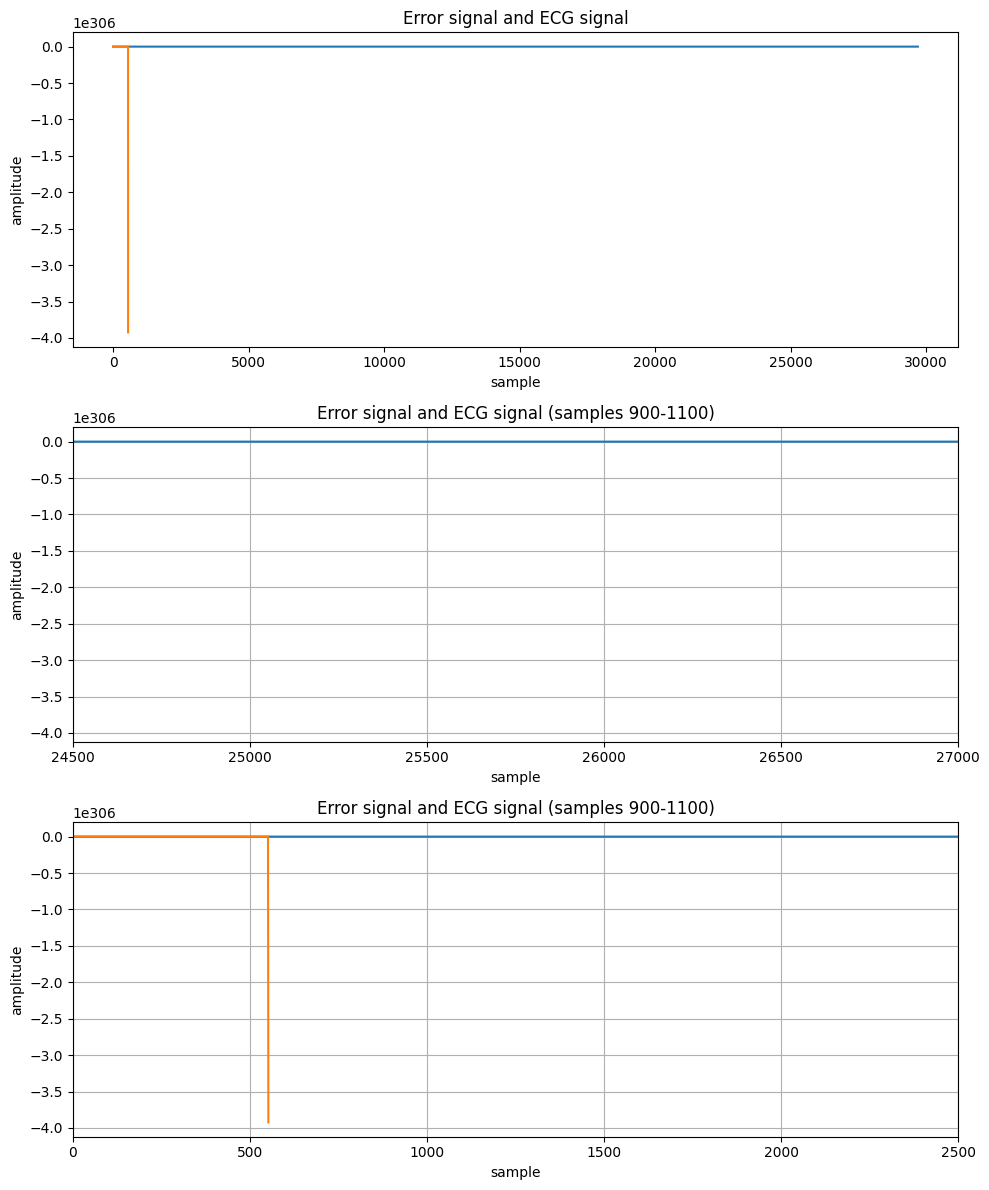

In [21]:
_, ax = plt.subplots(3, 1, figsize=(10, 12))
ax[0].plot(ecg)
ax[0].plot(lms_result.err)
ax[0].set_title('Error signal and ECG signal')
ax[0].set_xlabel('sample')
ax[0].set_ylabel('amplitude')

ax[1].plot(ecg)
ax[1].plot(lms_result.err)
ax[1].set_title('Error signal and ECG signal (samples 900-1100)')
ax[1].set_xlabel('sample')
ax[1].set_xlim(24500, 27000)
ax[1].grid()
ax[1].set_ylabel('amplitude')

ax[2].plot(ecg)
ax[2].plot(lms_result.err)
ax[2].set_title('Error signal and ECG signal (samples 900-1100)')
ax[2].set_xlabel('sample')
ax[2].set_xlim(0, 2500)
ax[2].grid()
ax[2].set_ylabel('amplitude')

plt.tight_layout()
plt.show()

> 8 Find good values for $\mu$, the delay and the length of the filter and compare the performance of
the adaptive line enhancer with the solution from the first part of the exercise.

In [3]:


# https://se.mathworks.com/help/dsp/ug/adaptive-line-enhancer-ale.html#AdaptiveLineEnhancerALEExample-6
# adjustable parameters for the ALE
mu = 0.1 # step size
D = 100 # signal delay
L = 30 # filter length

np.polyfit()
np.corrcoef()

Object `np.polyfit()` not found.


> 9 In principle, both the sinusoidal interference and the ECG signal are periodic functions. Explain
why the adaptive line enhancer still works and explain the pitfalls for this specific signal.

Interference from a 50 Hz powerline signal is quite common and can in principle also be removed with
a notch filter.

> 10  Design and implement a notch filter. Compare the results with the adaptive solutions.

In [ ]:
# Design and apply a 50 Hz notch filter.
b, a = signal.iirnotch(50, 30, 500)
ecg_notch = signal.filtfilt(b, a, ecg)


A very important design feature of a noise filter for ECG signals is that the filter must leave the shape
of the ECG signal unaltered to avoid wrong diagnosis.

> 11  Comment on the eficiency of the adaptive and non-adaptive solutions in this aspect.